<a href="https://colab.research.google.com/github/alchemistklk/pytorch_tutorial/blob/master/02_pytorch_classification_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # O2.Neural Network calssfication with PyTorch
 classification is a problem of predicting whether something is one thing or another(there can be mutiple things as the options).

## 1.Make classification and get it ready


In [ ]:
import sklearn


In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000
# the equavilent of random_state is random_seed
x_features, y_labels = make_circles(n_samples, noise=0.03, random_state=42)
len(x_features), len(y_labels)

(1000, 1000)

In [ ]:
print(f"first 5 samples of x_features is:\n {x_features[0:5]}")
print(f"first 5 samples of y_labels is:\n {y_labels[0:5]}")

first 5 samples of x_features is:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of y_labels is:
 [1 1 1 1 0]


In [ ]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": x_features[:, 0],
                        "X2": x_features[:, 1],
                        "label": y_labels})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
### 1.1 Visualize

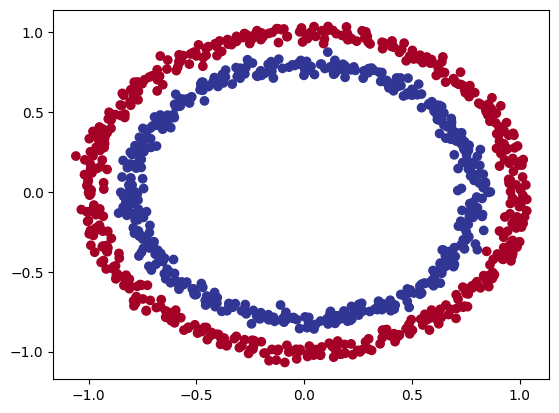

In [ ]:
# X1 vs X2
from matplotlib import pyplot as plt
plt.scatter(x=x_features[:, 0],
            y=x_features[:, 1],
            c=y_labels,
            cmap=plt.cm.RdYlBu)

**Note:** The data we are working with is often referred to as a toy dataset, a dataset that is small enough to experient but still sizeable enough to practice the fundmentals

### 1.2 Turn data into tensors and create train and test splits

In [ ]:
import torch

type(x_features), x_features.dtype

(numpy.ndarray, dtype('float64'))

In [ ]:
X = torch.from_numpy(x_features).type(torch.float)
y = torch.from_numpy(y_labels).type(torch.float)

In [ ]:
# Split data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(x_train), len(x_test)

(800, 200)

## 2.Building a model
Let's build a model to classify our red and blue dots.
To do so, we want to:
- Setup decivce angonistic code so our code will run on an accelerator(GPU) if these is one.
- Construct a model (by `nn.Module`)
- Define loss and optimizer function
- Create a training and test loop

In [ ]:
import torch
import torch.nn as nn
device = "cuda" if torch.cuda.is_available() else "cpu"

Now we've setup device agnostic code, let's create a model that:
1. Subclass `nn.Module`(almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear` layers that are capable of handling the shapes of data
3. Defines a `forward()` method that outlines the forward pass(or forward computation) of the model
4. Instatiate an instance of our model class and send it to target `device`

In [ ]:
# 1.Construct a model that subclass nn.Model
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # Create 2 nn.Linear layers capable of handling the shape of our data
    self.layer1 = nn.Linear(in_features=2, out_features=5) # take in 2 features and upscales to 5 features
    self.layer2 = nn.Linear(in_features=5, out_features=1) # take in 5 features from previous layer and outputs a single feature()

  # 3.Define a forward() method that outlines forward pass
  def forward(self, x):
    self.layer2(self.layer1(x)) # x -> layer1 -> layer2 -> output

# 4. Instantiate an instance of our model class and send it to target deivce
model0 = CircleModelV0().to(device)
model0

CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1407, -0.6434],
                      [-0.3207,  0.7049],
                      [-0.1604, -0.3185],
                      [ 0.1019, -0.2749],
                      [-0.5615, -0.3127]], device='cuda:0')),
             ('0.bias',
              tensor([-0.1530, -0.4674, -0.6808, -0.6859, -0.5588], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0909, -0.3004,  0.0214,  0.0694, -0.2151]], device='cuda:0')),
             ('1.bias', tensor([-0.3395], device='cuda:0'))])

In [ ]:
# Make prediction
untrained_preds = model_0(x_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape:{untrained_preds.shape}")
print(f"Length of test samples: {len(x_test)}, Shape:{x_test.shape}")
print(f"\n First 10 predictions: \n{untrained_preds[:10]}")
print(f"\n First 10 labels: \n{y_test[:10]}")

Length of predictions: 200, Shape:torch.Size([200, 1])
Length of test samples: 200, Shape:torch.Size([200, 2])

 First 10 predictions: 
tensor([[-0.3988],
        [-0.3711],
        [-0.2470],
        [-0.4427],
        [ 0.1092],
        [ 0.1234],
        [-0.0809],
        [ 0.0358],
        [-0.2623],
        [-0.3653]], device='cuda:0', grad_fn=<SliceBackward0>)

 First 10 labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1Setup loss function and optimizer
Which loss function or optimizer should you use?

For example for regression you might want to MAE or MSE(mean absolute error or mean squared error)

For classification you might want binary cross entropy

And for optimizer, two of most common and useful are SGD and Adam

In [ ]:
# setup the loss function
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

In [ ]:
model0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.2580, -0.2016],
                      [-0.6042,  0.6012],
                      [-0.0233,  0.0760],
                      [-0.1716,  0.0021],
                      [ 0.3966,  0.5746]], device='cuda:0')),
             ('layer1.bias',
              tensor([-0.6022,  0.6398, -0.4803,  0.1571,  0.5149], device='cuda:0')),
             ('layer2.weight',
              tensor([[ 0.3314,  0.2705, -0.1980, -0.3526, -0.1068]], device='cuda:0')),
             ('layer2.bias', tensor([0.2927], device='cuda:0'))])

In [ ]:
# Create Accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  accuracy = (correct / len(y_pred)) * 100
  return accuracy

## 3.Training

### 3.1 Going from raw logits -> predict probabilities -> prediction lables

Our model outputs are going to be raw **logits**

We can convert thses **logits** into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification)

Then we can convert our model's prediction probablities into `prediction lables` by either rounding them or taking the `argmax`

In [ ]:
# View the first 5 output of the forward pass on the test data
with torch.inference_mode():
  y_logits = model_0(x_test.to(device))[:5]
y_logits

tensor([[-0.3988],
        [-0.3711],
        [-0.2470],
        [-0.4427],
        [ 0.1092]], device='cuda:0')

In [ ]:
# Using some sigmod function to activate our model's logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4016],
        [0.4083],
        [0.4386],
        [0.3911],
        [0.5273]], device='cuda:0')

In [ ]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.]], device='cuda:0')

For our prediction probaility values, we need to perform a range-style rounding on them

- y_pred_prob >= 0.5, y=1(class 1)
- y_pred_prob < 0.5, y=0(class 2)

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)
# In full(logits -> pred porbs -> pred lables)
y_preds_lables = torch.round(torch.sigmoid(model_0(x_test.to(device))[:5]))

# check for equality
print(torch.eq(y_preds.squeeze(), y_preds_lables.squeeze()))

# Get rid of dimension
print(y_preds_lables.squeeze())

tensor([True, True, True, True, True], device='cuda:0')
tensor([0., 0., 0., 0., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>)


### 3.2 Building a training and test loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data on the target device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

# Build a training loop
for epoch in range(epochs):
  ### Training
  model_0.train()
  # 1. Forward pass
  y_logits = model_0(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss
  loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1.Forward Pass
    test_logits = model_0(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2.Calculate the loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f}, Accuracy: {acc:.2f}% | Test loss: {test_loss: .2f}, Test acc:{test_acc:.2f}%")


Epoch: 0 | Loss: 0.70, Accuracy: 47.88% | Test loss:  0.70, Test acc:48.00%
Epoch: 10 | Loss: 0.70, Accuracy: 49.12% | Test loss:  0.70, Test acc:46.50%
Epoch: 20 | Loss: 0.70, Accuracy: 50.50% | Test loss:  0.70, Test acc:46.00%
Epoch: 30 | Loss: 0.70, Accuracy: 50.75% | Test loss:  0.70, Test acc:44.50%
Epoch: 40 | Loss: 0.70, Accuracy: 50.12% | Test loss:  0.70, Test acc:48.00%
Epoch: 50 | Loss: 0.70, Accuracy: 49.75% | Test loss:  0.70, Test acc:49.50%
Epoch: 60 | Loss: 0.69, Accuracy: 49.88% | Test loss:  0.70, Test acc:52.50%
Epoch: 70 | Loss: 0.69, Accuracy: 49.25% | Test loss:  0.70, Test acc:50.50%
Epoch: 80 | Loss: 0.69, Accuracy: 49.38% | Test loss:  0.70, Test acc:49.50%
Epoch: 90 | Loss: 0.69, Accuracy: 49.62% | Test loss:  0.70, Test acc:50.50%


## 4.Make predictions and evaluate the model


In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

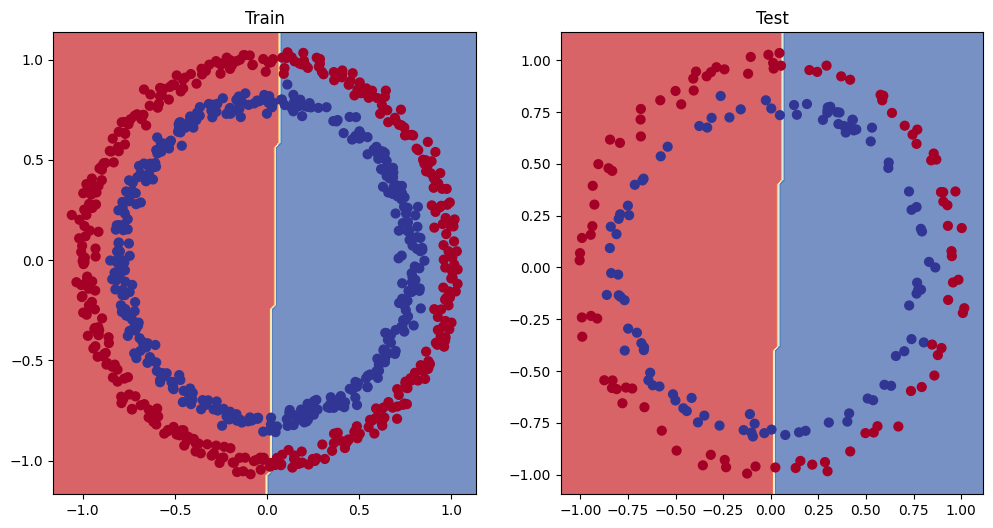

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, x_test, y_test)

## 5.Improving a model(from a model persepctive)

- Add more layers - give the model more chances to learn about patterns in the data

- Add more hidden units - go from 5 hidden units to 10 hidden units

- Fit for longer

- Changing the activation function

- Change the loss function

These options are all from a model's perspective because they deal directly with the model rather than data

And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred as **hyperparameters**

Let's try and improve our model by

- Adding more hidden units: 5 -> 10
- Increase the number of layers: 2 -> 3
- Increase the number of epochs: 100 -> 1000


In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    # Increase the number of layers
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2((self.layer_1(x))))

In [ ]:
model_1 = CircleModelV1().to(device)

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()
# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.001)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1000
# put the data to target device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)
# Write a training and evaluation loop for model_1
for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> predicition probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69392, Accuracy: 50.50% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 200 | Loss: 0.69389, Accuracy: 50.62% | Test loss: 0.69262, Test acc: 50.50%
Epoch: 300 | Loss: 0.69386, Accuracy: 50.62% | Test loss: 0.69263, Test acc: 50.50%
Epoch: 400 | Loss: 0.69383, Accuracy: 50.62% | Test loss: 0.69263, Test acc: 51.00%
Epoch: 500 | Loss: 0.69381, Accuracy: 50.75% | Test loss: 0.69264, Test acc: 50.50%
Epoch: 600 | Loss: 0.69378, Accuracy: 50.62% | Test loss: 0.69265, Test acc: 51.00%
Epoch: 700 | Loss: 0.69376, Accuracy: 50.25% | Test loss: 0.69266, Test acc: 51.00%
Epoch: 800 | Loss: 0.69373, Accuracy: 50.00% | Test loss: 0.69267, Test acc: 50.50%
Epoch: 900 | Loss: 0.69371, Accuracy: 49.88% | Test loss: 0.69268, Test acc: 50.50%


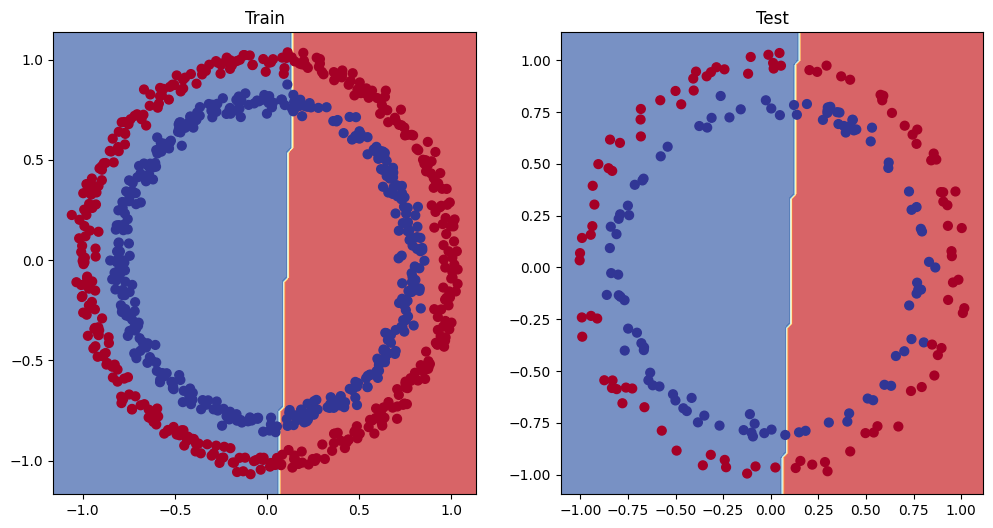

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, x_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problems is to test out a smaller problem.

In [ ]:
# Create some data(same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01
# Create Data
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# Check the lengths of each
len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

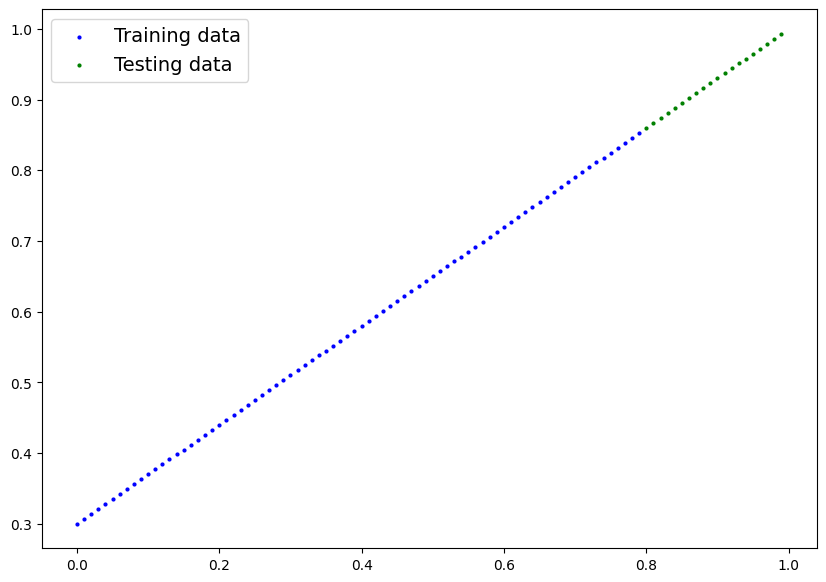

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test)

In [ ]:
### 5.2 Adjusting `model_1` to fit a straight line
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

In [ ]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.001)

In [ ]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  # 1. Forward pass
  y_pred = model_2(X_train)
  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)
  # 3. Optimizer zero grad
  optimizer.zero_grad()
  # 4. Loss backwards
  loss.backward()
  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test)
    test_loss = loss_fn(test_pred, y_test)

  ### Print
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986, Test loss: 0.94965
Epoch: 100 | Loss: 0.40272, Test loss: 0.54029
Epoch: 200 | Loss: 0.05876, Test loss: 0.13480
Epoch: 300 | Loss: 0.01461, Test loss: 0.03342
Epoch: 400 | Loss: 0.00308, Test loss: 0.00008
Epoch: 500 | Loss: 0.00309, Test loss: 0.00012
Epoch: 600 | Loss: 0.00309, Test loss: 0.00018
Epoch: 700 | Loss: 0.00299, Test loss: 0.00011
Epoch: 800 | Loss: 0.00299, Test loss: 0.00016
Epoch: 900 | Loss: 0.00289, Test loss: 0.00011


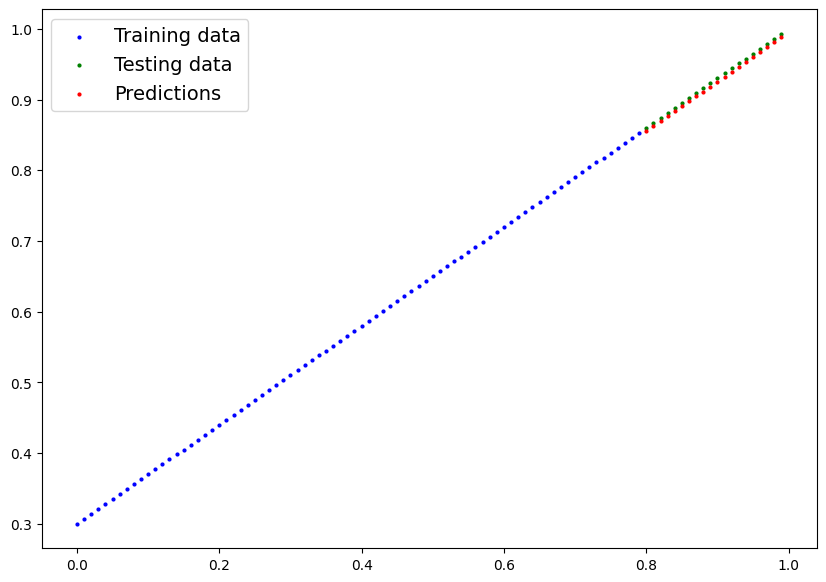

In [ ]:
# Turn on evaluation mode
model_2.eval()

# Make predictions
with torch.inference_mode():
  y_preds = model_2(X_test)
# Plot data and predictions
plot_predictions(train_data=X_train.cpu(),
                 train_labels=y_train.cpu(),
                 test_data=X_test.cpu(),
                 test_labels=y_test.cpu(),
                 predictions=y_preds.cpu())

 ## 6. The missing piece: non-linearity

 What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?

### 6.1 Recreating non-linear data(red and blue circles)

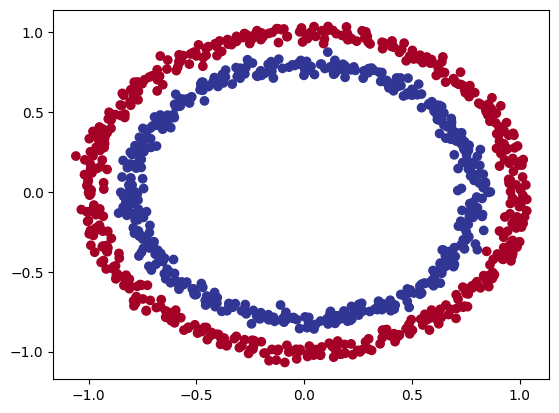

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)
plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Convert data to tensors and then train and test splits
import torch
from sklearn.model_selection import train_test_split
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Build a model with non-linearity

- Linear = straight lines
- Non-linear = non-straight lines


In [ ]:
# Build a model with non-linear activation
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=30)
    self.layer_2 = nn.Linear(in_features=30, out_features=20)
    self.layer_3 = nn.Linear(in_features=20, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model_3 = CircleModelV2().to(device)
model_3, device

(CircleModelV2(
   (layer_1): Linear(in_features=2, out_features=30, bias=True)
   (layer_2): Linear(in_features=30, out_features=20, bias=True)
   (layer_3): Linear(in_features=20, out_features=1, bias=True)
   (relu): ReLU()
 ),
 'cuda')

In [ ]:
# setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [ ]:
torch.cuda.manual_seed(42)
epochs = 1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

### 6.4 Training a model with non-linearity

In [ ]:
torch.cuda.manual_seed(42)
epochs = 1000
for epoch in range(epochs):
  ### Traning
  model_3.train()
  # 1.Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2.Calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. backpropagation
  loss.backward()
  # 5. update the weight
  optimizer.step()

  ### Testing
  model_3.eval()

  with torch.inference_mode():
    # 1. forward pass
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate the loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.69360, Accuracy: 54.25% | Test Loss: 0.69386, Test Accuracy: 55.00%
Epoch: 100 | Loss: 0.68634, Accuracy: 56.38% | Test Loss: 0.68787, Test Accuracy: 56.00%
Epoch: 200 | Loss: 0.67829, Accuracy: 63.00% | Test Loss: 0.68071, Test Accuracy: 63.50%
Epoch: 300 | Loss: 0.66504, Accuracy: 83.62% | Test Loss: 0.66820, Test Accuracy: 76.00%
Epoch: 400 | Loss: 0.63942, Accuracy: 95.12% | Test Loss: 0.64510, Test Accuracy: 92.00%
Epoch: 500 | Loss: 0.58696, Accuracy: 98.62% | Test Loss: 0.60024, Test Accuracy: 96.50%
Epoch: 600 | Loss: 0.48405, Accuracy: 98.88% | Test Loss: 0.51310, Test Accuracy: 96.50%
Epoch: 700 | Loss: 0.33670, Accuracy: 99.75% | Test Loss: 0.38277, Test Accuracy: 97.50%
Epoch: 800 | Loss: 0.20434, Accuracy: 100.00% | Test Loss: 0.25462, Test Accuracy: 98.00%
Epoch: 900 | Loss: 0.12230, Accuracy: 100.00% | Test Loss: 0.16716, Test Accuracy: 100.00%


In [ ]:
model_3.eval()
with torch.inference_mode():
  y_logits = model_3(X_test).squeeze()
  test_pred = torch.round(torch.sigmoid(y_logits))
test_pred[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

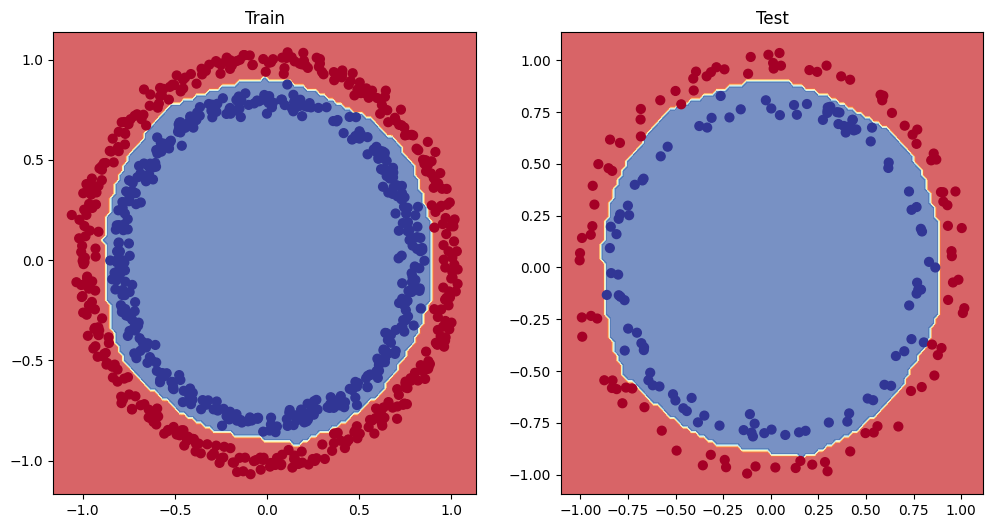

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

## 7.Replicating non-linear activation functions
Neural networks, rather than us telling the model what to learn, we give it tools to discover patterns in data and it tries to figure out the patterns on its own

And these tools are linear & non-linear

## 8. Putting things together by building a multi-class PyTorch model


### 8.1 Creating multi-class classification data
To begin a multi-classification problem, let's create some multi-class data.To do som we can leverage Scikit-Learn's `make_blobs()` method.

Specially, let's do the following:

- Creat some multi-class with `make-blobs()`
- Turn the data into tensors
- Split the data into training and test cases using `train_test_split()`
- Visualize the data

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


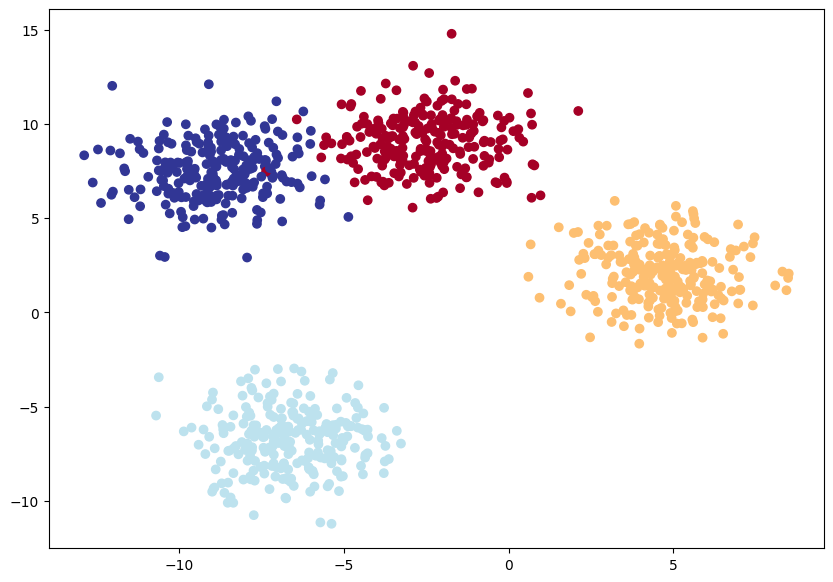

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1.Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std=1.5, random_state=RANDOM_SEED)

# 2.Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3.Split into data and test data
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)
# 4.plot the data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:,0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

### 8.2 Builing a multi-class classification model in PyTorch
To do so, let's create a subclass of `nn.Module` that takes the hyperparameters:
- `input_features`: the number of `X` features coming into the model
- `output_features`: the ideal numbers of the output features we'd like(this will be equavalent to `NUM_CLASSES` or the number of classes in your multi-class classification problem)
- `hidden_units`: the number of hidden neurons we'd like each hidden layer to use

In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
import torch.nn as nn
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features),
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=NUM_FEATURES, output_features=NUM_CLASSES, hidden_units=8).to(device)
model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Create a loss function and optimizer for a multi-class PyTorch model
Since we're working on multi-class classification problem, we will use `nn.CrossEntropyLoss()` method as our loss function

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(), lr=0.1)

### 8.4 Getting prediction probablities for multi-class PyTorch model

In [ ]:
model_4(X_blob_train.to(device))[:5]

tensor([[-0.5425,  0.0723, -0.6108,  0.7338],
        [ 0.4148, -0.2289, -0.1224,  0.5250],
        [-0.6360, -1.1695,  0.3445,  1.3646],
        [-0.3047, -0.6810,  0.1322,  0.9794],
        [ 0.4364, -0.2265, -0.1653,  0.3708]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [ ]:
y_logits = model_4(X_blob_train.to(device))
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred = torch.argmax(y_pred_probs, dim=1)

### 8.5 Creating a training and testing loop for a multi-class PyTorch Model


In [ ]:
torch.cuda.manual_seed(42)

epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  ### Training
  model_4.train()
  # 1. forward pass
  y_pred_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_pred_logits, dim=1).argmax(dim=1)
  # 2. calculate the loss
  loss = loss_fn(y_pred_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)
  # 3. zero grad
  optimizer.zero_grad()
  # 4. backpropagation
  loss.backward()
  # 5. step
  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    # 1. forward pass
    y_test_logits = model_4(X_blob_test)
    y_test_pred = torch.softmax(y_test_logits, dim=1).argmax(dim=1)
    # 2. calculate the loss
    test_loss = loss_fn(y_test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test, y_pred=y_test_pred)
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.38825, Acc: 4.88% | Test Loss: 1.11775, Test Acc: 35.00%
Epoch: 10 | Loss: 0.28319, Acc: 98.50% | Test Loss: 0.24932, Test Acc: 99.00%
Epoch: 20 | Loss: 0.11429, Acc: 98.88% | Test Loss: 0.10361, Test Acc: 99.00%
Epoch: 30 | Loss: 0.07358, Acc: 99.00% | Test Loss: 0.06571, Test Acc: 99.50%
Epoch: 40 | Loss: 0.05728, Acc: 98.88% | Test Loss: 0.04962, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04872, Acc: 98.88% | Test Loss: 0.04089, Test Acc: 99.50%
Epoch: 60 | Loss: 0.04354, Acc: 98.88% | Test Loss: 0.03549, Test Acc: 99.50%
Epoch: 70 | Loss: 0.04009, Acc: 99.00% | Test Loss: 0.03185, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03766, Acc: 99.12% | Test Loss: 0.02924, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03585, Acc: 99.12% | Test Loss: 0.02729, Test Acc: 99.50%


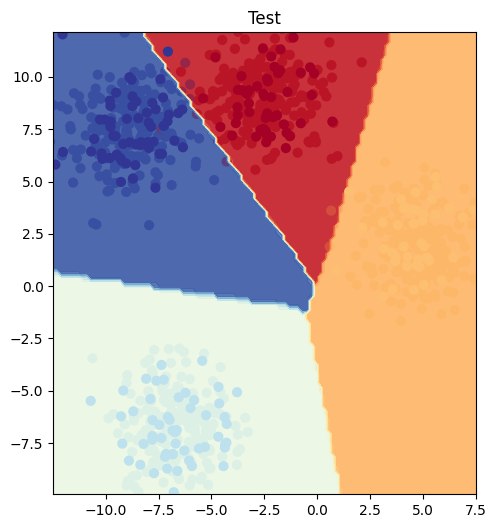

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 1)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9.More classifiction evaluation metrics

- Accuracy
- Precision
- Recall
- F1-score
- Confusion matrix
- Classification report


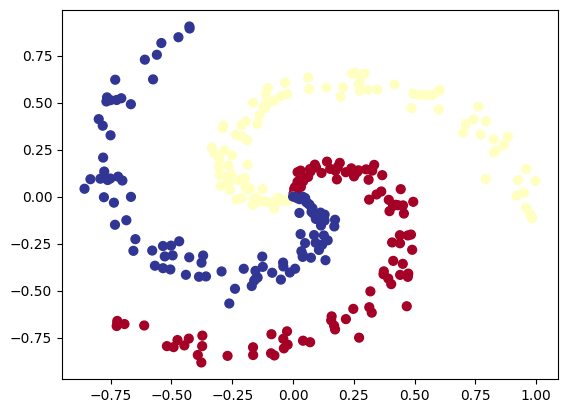

In [ ]:
# Turn data into numpy
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
!pip -q install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 8.7 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy
accuracy_fn = Accuracy(task="multiclass", num_classes=4).to(device)
